In [53]:
import sys
sys.path.append('./../')
import torch_geometric as pyg
from torch_geometric.datasets import ZINC
from ogb.graphproppred import PygGraphPropPredDataset
import torch
import os.path as osp
import os
from tqdm import tqdm
from definitions import ROOT_DIR
from torch_geometric.utils import degree
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [54]:
root = os.path.join(ROOT_DIR, 'datasets')
zinc_raw_dir = osp.join(root, 'ZINC', 'raw')
molhiv_raw_dir = osp.join(root, 'MOLHIV', 'raw')

dataset1 = ZINC(zinc_raw_dir, subset=False, split='train')
dataset2 = ZINC(zinc_raw_dir, subset=False, split='val')
dataset3 = ZINC(zinc_raw_dir, subset=False, split='test')

dataset4 = PygGraphPropPredDataset('ogbg-molhiv', molhiv_raw_dir)

In [27]:
def max_degree(g):
    degrees = degree(g.edge_index[1], g.x.size(0), dtype=g.x.dtype)
    return degrees.max()

In [28]:
def draw(molecule):
    g = pyg.utils.to_networkx(molecule, to_undirected=False)
    nx.draw(g, with_labels=True, node_size=150)

In [57]:
outlist1 = []
for dataset in [dataset1, dataset2, dataset3]:
    for i, g in tqdm(enumerate(dataset)):
        outuple = max_degree(g)
        outlist1.append(outuple.item())

220011it [00:19, 11173.99it/s]
24445it [00:02, 11736.50it/s]
5000it [00:00, 5347.55it/s] 


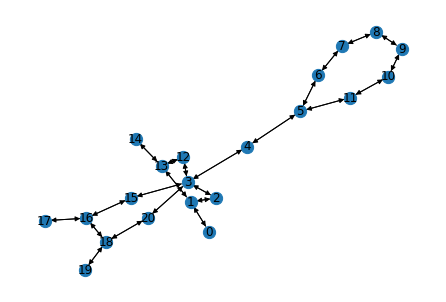

In [58]:
draw(dataset1[71128])

In [59]:
outlist2 = []
for dataset in [dataset4]:
    for i, g in tqdm(enumerate(dataset)):
        outuple = max_degree(g)
        outlist2.append(outuple.item())

41127it [00:01, 40278.72it/s]


Text(0.5, 1.0, "ZINC dataset's graphs' maximum degree")

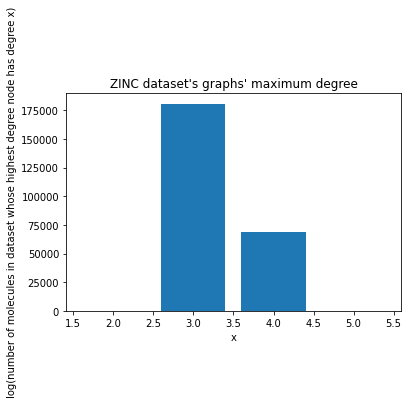

In [76]:
lii_unique = list(set(outlist1))
counts = [(outlist1.count(value)) for value in lii_unique]
log_counts = [np.log(outlist1.count(value)) for value in lii_unique]
barcontainer = plt.bar((lii_unique),counts)
plt.ylabel('log(number of molecules in dataset whose highest degree node has degree x)')
plt.xlabel('x')
plt.title("ZINC dataset's graphs' maximum degree")

In [77]:
counts

[3, 180569, 68883, 1]

Text(0.5, 1.0, "MOLHIV dataset's graphs' maximum degree")

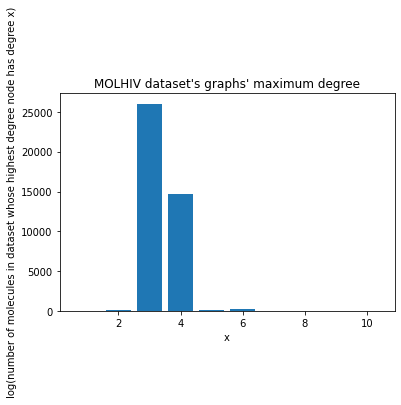

In [73]:
lii_unique = list(set(outlist2))
counts = [(outlist2.count(value)) for value in lii_unique]
log_counts = [np.log(outlist2.count(value)) for value in lii_unique]
barcontainer = plt.bar((lii_unique),counts)
plt.ylabel('log(number of molecules in dataset whose highest degree node has degree x)')
plt.xlabel('x')
plt.title("MOLHIV dataset's graphs' maximum degree")

In [74]:
counts

[2, 58, 26039, 14668, 86, 231, 11, 12, 17, 3]

In [68]:
len(outlist)

41127

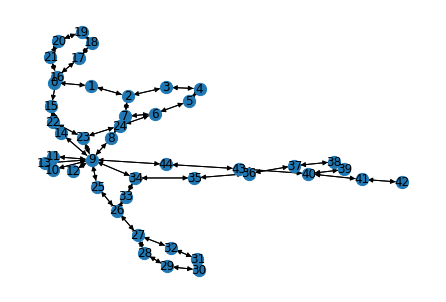

In [8]:
draw(dataset4[18092])

In [9]:
# import pickle

# # with open('datasets/ZINC/raw/raw/atom_dict.pickle', 'rb') as f:
# # 	atom_dict = pickle.load(f)
# # with open('datasets/ZINC/raw/raw/test.pickle', 'rb') as f:
# # 	test = pickle.load(f)
# # with open('datasets/ZINC/raw/raw/val.pickle', 'rb') as f:
# # 	val = pickle.load(f)
# with open('datasets/ZINC/raw/raw/train.pickle', 'rb') as f:
# 	train = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/ZINC/raw/raw/train.pickle'